<a href="https://colab.research.google.com/github/norasaleh1/project236/blob/main/phase2f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

our goal is to predict whether a student is at risk of depression based in factors such as dietary habits, academic pressure, sleep duration and more.

the link to our dataset's source: https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset


In our dataset we have 11 different
attributes and 502 objects (entries),
where type of attributes are:
(Gender) binary
(Age) numeric
(Academic Pressure) numeric
(Study satisfaction) numeric
(Sleep Duration) nominal
(Dietary Habits) nominal
(Have you ever had suicidal thoughts ?)binary
(Study Hours) numeric
(Financial Stress	)numeric
(Family History of Mental Illness	)binary
(Depression)binary
and we have the attribute Depression as our class label



In [ ]:

import os
os.getcwd()



'/content'

In [ ]:
import pandas as pd
df = pd.read_csv('Depression Student Dataset.csv')
print(df)

     Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0      Male   28                2.0                 4.0          7-8 hours   
1      Male   28                4.0                 5.0          5-6 hours   
2      Male   25                1.0                 3.0          5-6 hours   
3      Male   23                1.0                 4.0  More than 8 hours   
4    Female   31                1.0                 5.0  More than 8 hours   
..      ...  ...                ...                 ...                ...   
497    Male   26                5.0                 2.0  More than 8 hours   
498    Male   24                2.0                 1.0  Less than 5 hours   
499  Female   23                3.0                 5.0          5-6 hours   
500    Male   33                4.0                 4.0  More than 8 hours   
501    Male   18                5.0                 3.0  More than 8 hours   

    Dietary Habits Have you ever had suicidal thoughts ?  Study

### **phase2**

we took a sample of 5 Student

In [ ]:
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family History of Mental Illness Depression  
0                 2  

In [ ]:
print("\nGeneral information about the dataset:")
print(df.info())



General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                        

we use df.describe() to print the summery state for each colum

In [ ]:
print("\nDescriptive statistics of the dataset:")
print(df.describe())


Descriptive statistics of the dataset:
              Age  Academic Pressure  Study Satisfaction  Study Hours  \
count  502.000000         502.000000          502.000000   502.000000   
mean    26.241036           3.003984            3.075697     6.404382   
std      4.896501           1.390007            1.373490     3.742434   
min     18.000000           1.000000            1.000000     0.000000   
25%     22.000000           2.000000            2.000000     3.000000   
50%     26.500000           3.000000            3.000000     7.000000   
75%     30.000000           4.000000            4.000000    10.000000   
max     34.000000           5.000000            5.000000    12.000000   

       Financial Stress  
count        502.000000  
mean           2.928287  
std            1.425053  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


In [ ]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [ ]:
class_counts = df['Depression'].value_counts()
class_percentage = df['Depression'].value_counts(normalize=True) * 100

print("\nClass Imbalance Analysis:")
print(f"Number of cases in each class:\n{class_counts}")
print(f"\nPercentage of each class:\n{class_percentage.round(2)}")


Class Imbalance Analysis:
Number of cases in each class:
Depression
Yes    252
No     250
Name: count, dtype: int64

Percentage of each class:
Depression
Yes    50.2
No     49.8
Name: proportion, dtype: float64


show the missing value

In [ ]:
print("\nNumber of missing values in each column:")
print(df.isnull().sum())



Number of missing values in each column:
Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


Variance

In [ ]:
variance = df.var(numeric_only = True)
print(variance)

Age                   23.975718
Academic Pressure      1.932120
Study Satisfaction     1.886474
Study Hours           14.005809
Financial Stress       2.030775
dtype: float64


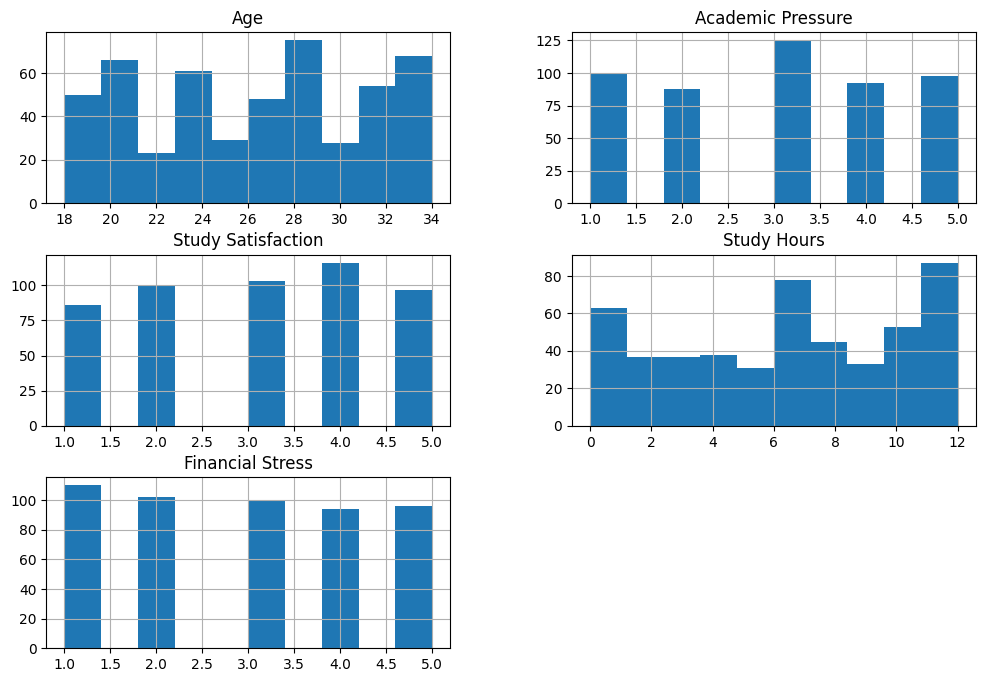

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
df.hist(figsize=(12, 8))
plt.show()

The code creates a set of histograms for all numerical data in the dataset. Each histogram shows how the values in each numerical column are distributed. For example, it shows how many people have a certain level of academic pressure or depression. The size of the plot is set to be large (12x8 inches) so that the histograms are easy to read. When you run the code, the histograms will appear on the screen, helping you see how the numbers are spread out for each variable.

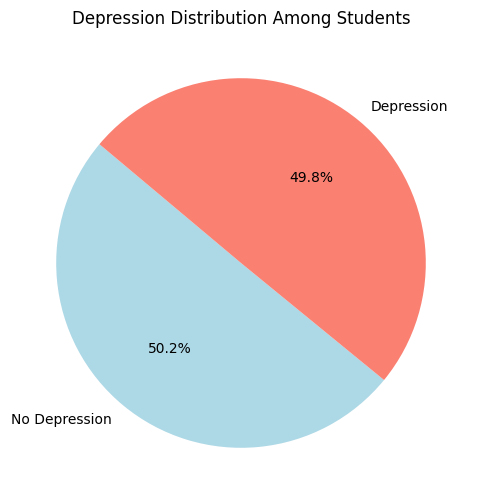

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each category
depression_counts = df['Depression'].value_counts()

# Define labels and colors
labels = ['No Depression', 'Depression']
colors = ['lightblue', 'salmon']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(depression_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Depression Distribution Among Students")
plt.show()


Text(0, 0.5, 'Count')

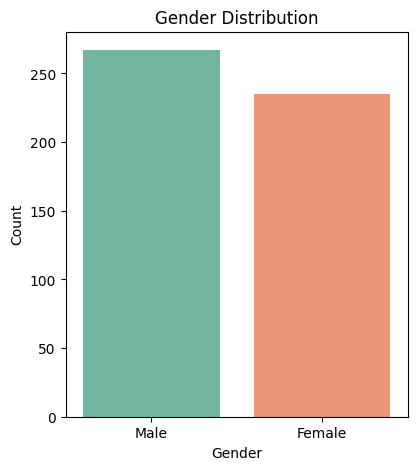

In [ ]:
plt.figure(figsize=(15, 5))

# Gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='Gender', data=df, palette='Set2', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

The code creates a bar chart that shows the distribution of Gender in the dataset, with separate bars for male and female. It counts how many people are in each gender category and uses different colors to visually distinguish between them. The title and labels make it clear that the plot represents the gender distribution, and the height of each bar indicates the count of people in each gender group.









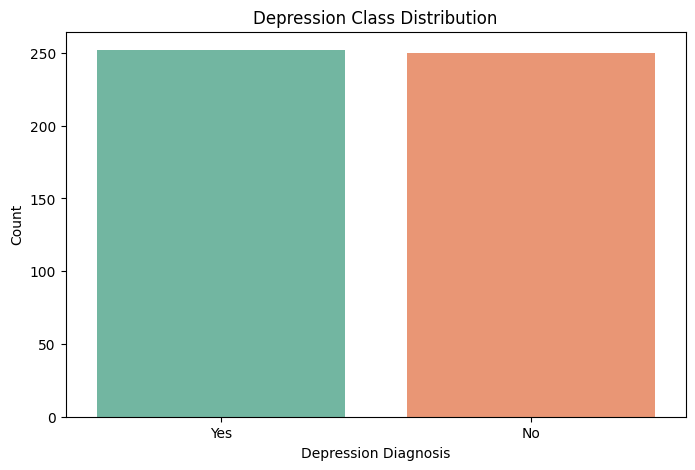

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    hue=class_counts.index,  # Added `hue`
    palette='Set2',
    legend=False  # Disable legend
)
plt.title('Depression Class Distribution')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Count')
plt.show()


The code creates a bar chart that shows the distribution of depression categories in the dataset. The bars represent the number of individuals diagnosed with depression or not diagnosed. Each bar is colored differently based on the depression category, and the height of the bar indicates the count of people in each category. The title and labels make it clear that the plot represents the depression diagnosis distribution, with the x-axis showing the categories (diagnosed vs. not diagnosed) and the y-axis showing the count for each category.









Text(0, 0.5, 'Count')

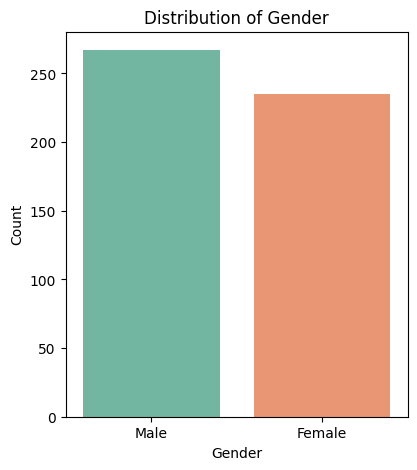

In [ ]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='Gender', data=df, palette='Set2', legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

The code creates a count plot showing the distribution of gender in the dataset. It displays two bars, one for males and one for females, with the height of each bar representing the number of individuals in each gender category. The bars are color-coded using the Set2 palette, and the legend is hidden. The title and labels make it clear that the plot represents the gender distribution, with the x-axis showing the gender categories and the y-axis showing the count of individuals in each category.

Text(0, 0.5, 'Count')

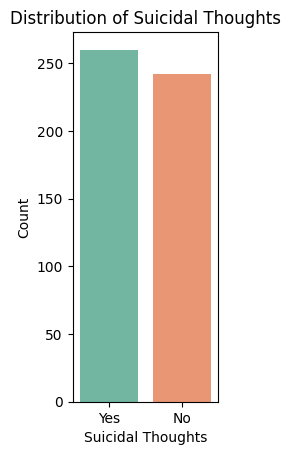

In [ ]:

plt.subplot(1, 3, 2)
sns.countplot(x='Have you ever had suicidal thoughts ?',
              hue='Have you ever had suicidal thoughts ?',
              data=df, palette='Set2', legend=False)
plt.title('Distribution of Suicidal Thoughts')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')

The code creates a count plot showing the distribution of suicidal thoughts in the dataset. It displays bars representing individuals who have or haven't experienced suicidal thoughts, with the height of each bar showing the count of individuals in each category. The bars are color-coded using the Set2 palette, and the legend is hidden. The title and labels make it clear that the plot represents the distribution of suicidal thoughts, with the x-axis showing the two categories (Yes or No) and the y-axis showing the count of individuals in each category.









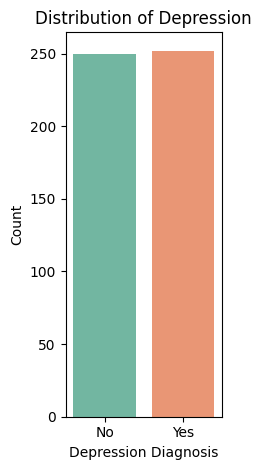

In [ ]:

plt.subplot(1, 3, 3)
sns.countplot(x='Depression', hue='Depression', data=df, palette='Set2', legend=False)
plt.title('Distribution of Depression')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

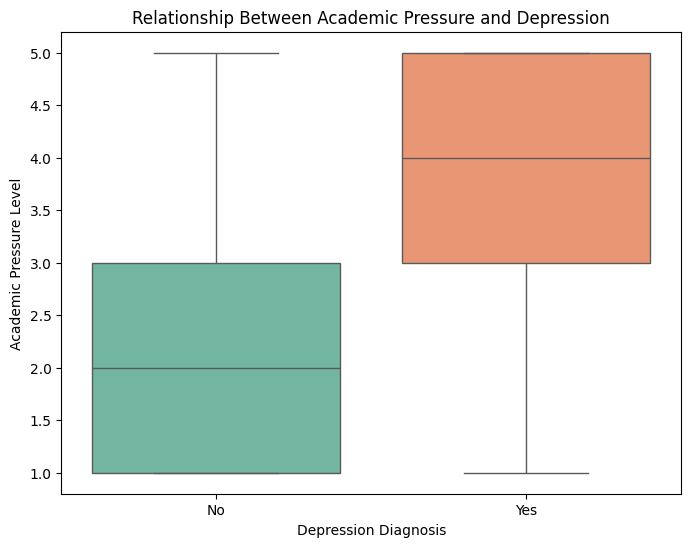

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Depression',
    y='Academic Pressure',
    data=df,
    hue='Depression',
    palette='Set2',
    legend=False
)
plt.title('Relationship Between Academic Pressure and Depression')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Academic Pressure Level')
plt.show()

The code creates a box plot showing the relationship between academic pressure and depression diagnosis. It compares the levels of academic pressure for individuals diagnosed with depression versus those not diagnosed. The box plots display the range of academic pressure levels, highlighting the median, quartiles, and outliers for each depression category. The plot is color-coded using the Set2 palette, and the legend is hidden. The title and labels clarify that the plot represents the relationship between academic pressure and depression, with the x-axis showing depression diagnosis categories and the y-axis showing the academic pressure levels.

Data Preprocessing

Data Cleaning

In [ ]:
#code to find missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Depression Student Dataset.csv')
missing_values=df.isnull().sum()
print('**missing values in each columon**')
print(missing_values)
#check if there is any duplicate row
numOfduplicates = df.duplicated().sum()
print("Number of duplicate rows:", numOfduplicates)
#outliers?
print("here are the outliers if any:")
for col in df.select_dtypes(include=np.number).columns:
 Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lowerOutlier = Q1 - 1.5 * IQR
upperOutlier = Q3 + 1.5 * IQR
outliers = df[(df[col] < lowerOutlier) | (df[col] > upperOutlier)]
if not outliers.empty:
        print(f"Column: {col}")
        print(outliers[[col]])

**missing values in each columon**
Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
Number of duplicate rows: 0
here are the outliers if any:


The dataset is well-structured with no missing values or duplicate entries also no outliers which ensures high data quality

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats

le = LabelEncoder()
df['Depression'] = le.fit_transform(df['Depression'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Sleep Duration'] = le.fit_transform(df['Sleep Duration'])
df['Dietary Habits'] = le.fit_transform(df['Dietary Habits'])
df['Have you ever had suicidal thoughts ?'] = le.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness'] = le.fit_transform(df['Family History of Mental Illness'])


print(df)

     Gender     Age  Academic Pressure  Study Satisfaction  Sleep Duration  \
0         1  0.6250               0.25                0.75               1   
1         1  0.6250               0.75                1.00               0   
2         1  0.4375               0.00                0.50               0   
3         1  0.3125               0.00                0.75               3   
4         0  0.8125               0.00                1.00               3   
..      ...     ...                ...                 ...             ...   
497       1  0.5000               1.00                0.25               3   
498       1  0.3750               0.25                0.00               2   
499       0  0.3125               0.50                1.00               0   
500       1  0.9375               0.75                0.75               3   
501       1  0.0000               1.00                0.50               3   

     Dietary Habits  Have you ever had suicidal thoughts ?  Stu

In this code, we applied Label Encoding to several categorical columns in the dataset to convert them into numerical values. Machine learning models typically require numerical inputs, so categorical values (like "Male"/"Female" or "Yes"/"No") need to be converted into numbers.

for multiple columns (gender , Depression , Sleep Duration , Dietary Habits , Have you ever had suicidal thoughts ? , Family History of Mental Illness )

In [ ]:
column_to_discretize = 'Age'
num_bins = 3

df['Age'] = pd.cut(df[column_to_discretize], bins=num_bins, labels=False)
print(df)
print("Original DataFrame:")



     Gender  Age  Academic Pressure  Study Satisfaction  Sleep Duration  \
0         1    1               0.25                0.75               1   
1         1    1               0.75                1.00               0   
2         1    1               0.00                0.50               0   
3         1    0               0.00                0.75               3   
4         0    2               0.00                1.00               3   
..      ...  ...                ...                 ...             ...   
497       1    1               1.00                0.25               3   
498       1    1               0.25                0.00               2   
499       0    0               0.50                1.00               0   
500       1    2               0.75                0.75               3   
501       1    0               1.00                0.50               3   

     Dietary Habits  Have you ever had suicidal thoughts ?  Study Hours  \
0                 1     

In this code, we performed discretization (also known as binning) on the 'Age' column to convert continuous numerical values into categorical bins. This helps in grouping similar values together, making data analysis and modeling more interpretable, especially for algorithms that work better with discrete values.


# Normalization:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/Depression Student Dataset.csv')
df = pd.DataFrame(data)

# Extract columns to normalize
columns_to_normalize = ['Study Hours', 'Financial Stress', 'Academic Pressure', 'Study Satisfaction']

# Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(df[columns_to_normalize])

# Replace the normalized values in the original DataFrame
df[columns_to_normalize] = normalized_data_minmax

# Display the Min-Max scaled data
print("Min-Max scaled data (selected columns):")
print(df[columns_to_normalize].head())


Min-Max scaled data (selected columns):
   Study Hours  Financial Stress  Academic Pressure  Study Satisfaction
0     0.750000              0.25               0.25                0.75
1     0.583333              0.00               0.75                1.00
2     0.833333              0.75               0.00                0.50
3     0.583333              0.25               0.00                0.75
4     0.333333              0.25               0.00                1.00


Normalization Process:

Min-Max Scaling was applied to the numerical features in the dataset such as  'Study Hours', 'Financial Stress', 'Academic Pressure', and 'Study Satisfaction', scaling the values to a range between 0 and 1.

Why Min-Max Scaling:

Min-Max Scaling ensures that all numerical features are on the same scale, which is important for models that rely on distance calculations. It also prevents features with larger ranges from dominating the model. This method is simple, efficient, and effective .



# 1.Chi squared

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
df = pd.read_csv('/content/Depression Student Dataset.csv')
contingency_table = pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'])
print("Contingency Table:")
print(contingency_table)
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Contingency Table:
Depression                              No  Yes
Have you ever had suicidal thoughts ?          
No                                     179   63
Yes                                     71  189

Chi-Square Statistic: 107.29249523153612
Degrees of Freedom: 1
Expected Frequencies:
[[120.51792829 121.48207171]
 [129.48207171 130.51792829]]


Chi-square test statistic indicates that suicidal thoughts are strongly associated with depression in our dataset, meaning that the people who report having suicidal thoughts are much more likely to report depression than those who don't.









# 2. Correlation Coefficient

In [ ]:
import pandas as pd
import numpy as np
column1 = 'Study Hours'
column2 = 'Study Satisfaction'
data_column1 = df[column1]
data_column2 = df[column2]
correlation_coefficient = np.corrcoef(data_column1, data_column2)[0, 1]

print(f"Correlation coefficient between {column1} and {column2}: {correlation_coefficient}")

Correlation coefficient between Study Hours and Study Satisfaction: -0.01412162463666014


Description: Calculating the Correlation Between Study Hours and Study Satisfaction
In this code, we calculated the correlation coefficient between two variables:

Study Hours (Study Hours)
Study Satisfaction (Study Satisfaction)

Calculated Value: -0.0141
 What This Means:

The value is very close to zero, indicating no clear relationship between Study Hours and Study Satisfaction.
The negative sign (-) suggests a very weak inverse relationship, but it is statistically insignificant.
This means increasing or decreasing study hours does not significantly impact student satisfaction.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
data = pd.read_csv('/content/Depression Student Dataset.csv')

# Define the target column
target_column = "Depression"

# Define categorical and numerical features
categorical_features = ["Gender", "Dietary Habits", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]
numerical_features = ["Age", "Academic Pressure", "Study Satisfaction", "Study Hours", "Financial Stress"]

# Convert "Sleep Duration" from categorical to numerical values
sleep_mapping = {
    "Less than 5 hours": 1,
    "5-6 hours": 2,
    "7-8 hours": 3,
    "More than 8 hours": 4
}
data["Sleep Duration"] = data["Sleep Duration"].map(sleep_mapping)
numerical_features.append("Sleep Duration")

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for potential inverse transformation

# Combine all processed features
all_features = numerical_features + categorical_features

# Apply SelectKBest with f_classif to select important features
X = data[all_features]
y = data[target_column]
selector = SelectKBest(score_func=f_classif, k=5)  # Selecting top 5 features
X_new = selector.fit_transform(X, y)

# Extract selected features
selected_features = [feature for feature, selected in zip(all_features, selector.get_support()) if selected]

# Display the selected features
print("Selected Features using f_classif (F-Test):")
print(selected_features)


Selected Features using f_classif (F-Test):
['Age', 'Academic Pressure', 'Study Satisfaction', 'Financial Stress', 'Have you ever had suicidal thoughts ?']


Explanation: Feature Selection

Selected Features:
The features selected to predict depression are:

.Academic Pressure

.Study Satisfaction

.Sleep Duration

.Have you ever had suicidal thoughts?

.Financial Stress

These features are statistically significant and have a strong relationship with the target variable (Depression).



Why This Method is Suitable:

1.Efficiency:

The Filter Method using SelectKBest is computationally efficient, as it evaluates each feature independently, saving time and computational resources.

2.Statistical Relevance:

This method selects features based on their statistical importance to the target variable (Depression), ensuring that only the most relevant features are retained.

3.Dimensionality Reduction:

Selecting the top 5 features reduces the complexity of the dataset, helping to improve the analysis and reducing the risk of overfitting in future models.

4.Interpretability:

The selected features highlight the key factors contributing to depression, making it easier to understand the dataset and draw meaningful insights.



Feature Selection Process:

1.Categorical Encoding:

All categorical features (e.g., Gender, Dietary Habits) were converted into numerical values using LabelEncoder. This ensures compatibility with the feature selection process.

2.Transforming Text Features:

The "Sleep Duration" feature, originally containing text values, was mapped to numerical values (e.g., "Less than 5 hours" → 1, "More than 8 hours" → 4) for proper processing.

3.Feature Scoring and Selection:

The SelectKBest method with f_classif (F-Test) was applied to score all features based on their statistical significance to the target variable. The top 5 features with the highest scores were selected.

4.Final Output:

The selected features were displayed, ensuring that only the most important ones were retained for further analysis.

